In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statistics as stat

In [3]:
df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


 # 1. Find out how many males and females participated in the test

In [6]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

# 2. What do you think about the students parental level of education

In [7]:
exams = df[['math score', 'reading score', 'writing score']]

In [8]:
for i in exams:
    exam_pivot = pd.pivot_table(df,columns = 'parental level of education', values = i, aggfunc = 'mean')
    display(exam_pivot)

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
math score,67.977477,69.288136,61.821429,70.254237,67.128319,63.134078


parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
reading score,71.018018,73.0,64.602041,75.949153,69.566372,66.759777


parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
writing score,70.031532,73.381356,62.403061,75.677966,69.035398,64.888268


# 3. who scores the most on average for math,reading and writing based on gender , test preparation course


In [9]:
df['average score']=(df['math score']+df['reading score']+df['writing score'])/3
df['average score']

0        9.000000
1       18.333333
2       26.000000
3       27.000000
4       31.333333
          ...    
995     89.000000
996     94.000000
997     98.666667
998     97.666667
999    100.000000
Name: average score, Length: 1000, dtype: float64

<AxesSubplot:xlabel='average score', ylabel='math score'>

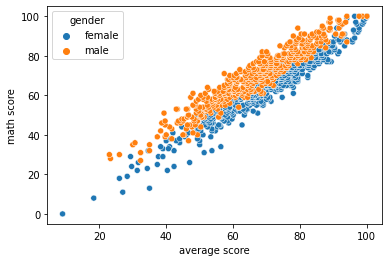

In [10]:
sns.scatterplot(x=df['average score'],y=df['math score'],hue=df['gender'])

<AxesSubplot:xlabel='average score', ylabel='writing score'>

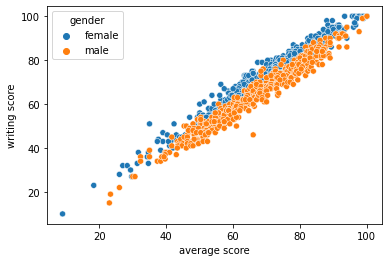

In [11]:
sns.scatterplot(x=df['average score'],y=df['writing score'],hue=df['gender'])

<AxesSubplot:xlabel='average score', ylabel='reading score'>

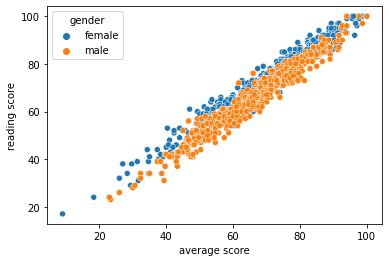

In [12]:
sns.scatterplot(x=df['average score'],y=df['reading score'],hue=df['gender'])

<AxesSubplot:xlabel='average score', ylabel='math score'>

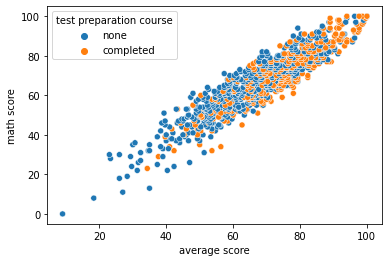

In [13]:
sns.scatterplot(x=df['average score'],y=df['math score'],hue=df['test preparation course'])

<AxesSubplot:xlabel='average score', ylabel='reading score'>

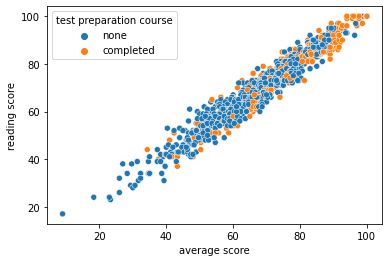

In [14]:
sns.scatterplot(x=df['average score'],y=df['reading score'],hue=df['test preparation course'])

<AxesSubplot:xlabel='average score', ylabel='writing score'>

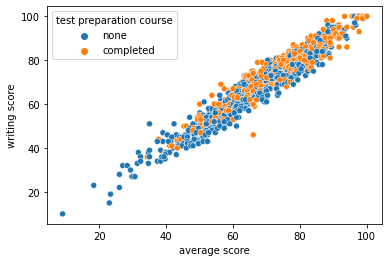

In [15]:
sns.scatterplot(x=df['average score'],y=df['writing score'],hue=df['test preparation course'])

# 4. What do you think about the scoring variation for math, reading and writing        based on gender , test preparation course.

array([[<AxesSubplot:title={'center':'math score'}, xlabel='[gender]'>,
        <AxesSubplot:title={'center':'reading score'}, xlabel='[gender]'>],
       [<AxesSubplot:title={'center':'writing score'}, xlabel='[gender]'>,
        <AxesSubplot:>]], dtype=object)

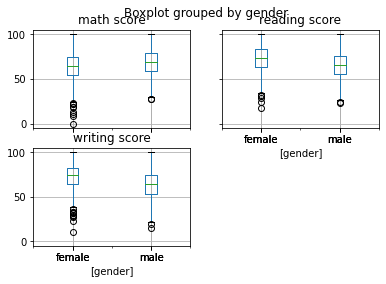

In [16]:
df.boxplot(['math score','reading score', 'writing score'],['gender'])

array([[<AxesSubplot:title={'center':'math score'}, xlabel='[test preparation course]'>,
        <AxesSubplot:title={'center':'reading score'}, xlabel='[test preparation course]'>],
       [<AxesSubplot:title={'center':'writing score'}, xlabel='[test preparation course]'>,
        <AxesSubplot:>]], dtype=object)

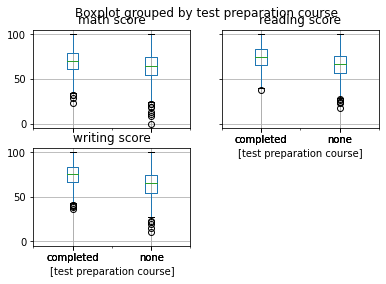

In [17]:
df.boxplot(['math score','reading score', 'writing score'],['test preparation course'])

# 5. The management needs your help to give bonus points to the top 25% of             students based on their math score,so how will you help the management           to achieve this.

In [18]:
stat.stdev(df['math score'])

15.569566802272002

In [19]:
stat.variance(df['math score'])

242.4114104104104